In [160]:
# 1. Import the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [161]:
# Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [162]:
# Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

customer_df.rename(columns=lambda c: c.lower().replace(' ', '_'), inplace=True)
customer_df.rename(columns={'employmentstatus': 'employment_status'}, inplace=True)

In [163]:
# 2. Find all of the categorical data. Save it in a categorical_df variable

categorical_df = customer_df.select_dtypes(include=object)
categorical_df.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [164]:
# 3. Check for NaN values

categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
effective_to_date    0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [165]:
# 4. Check all unique values of columns

categorical_df.nunique()

customer             9134
state                   5
response                2
coverage                3
education               5
effective_to_date      59
employment_status       5
gender                  2
location_code           3
marital_status          3
policy_type             3
policy                  9
renew_offer_type        4
sales_channel           4
vehicle_class           6
vehicle_size            3
dtype: int64

In [166]:
# 5. Check dtypes. Do they all make sense as categorical data?

categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
effective_to_date    object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [167]:
categorical_df.head()

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [168]:
# Response could be a boolean
# Effective To Date could be a datetime

In [169]:
# 6. Does any column contain alpha and numeric data?  Decide how to clean it

categorical_df.drop(columns='customer', axis=1, inplace=True)

In [170]:
# 7. Would you choose to do anything else to clean or wrangle the categorical data?  Comment your decisions

# Response can be transformed into boolean as there are only 2 values 

In [171]:
# Transform Response into boolean
categorical_df['response'] = categorical_df['response'].astype(bool)
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

# Update categorical dataframe
categorical_df = customer_df.select_dtypes(exclude=[np.number, np.datetime64])

In [172]:
categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [173]:
# 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

categorical_df[['policy_type', 'policy']]

,policy_type,policy
0,Corporate Auto,Corporate L3
1,Personal Auto,Personal L3
2,Personal Auto,Personal L3
3,Corporate Auto,Corporate L2
4,Personal Auto,Personal L1
...,...,...
9129,Personal Auto,Personal L1
9130,Corporate Auto,Corporate L3
9131,Corporate Auto,Corporate L2
9132,Personal Auto,Personal L2


In [174]:
categorical_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [175]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [176]:
# They provide information about the type of insurance with different level of granularity

In [177]:
# 9. Check number of unique values in each column, can they be combined in any way to ease encoding?  Comment your thoughts and make those changes

print(categorical_df['policy_type'].value_counts()['Personal Auto'] == categorical_df['policy'].value_counts()['Personal L3'] + categorical_df['policy'].value_counts()['Personal L2'] + categorical_df['policy'].value_counts()['Personal L1'])
print(categorical_df['policy_type'].value_counts()['Corporate Auto'] == categorical_df['policy'].value_counts()['Corporate L3'] + categorical_df['policy'].value_counts()['Corporate L2'] + categorical_df['policy'].value_counts()['Corporate L1'])
print(categorical_df['policy_type'].value_counts()['Special Auto'] == categorical_df['policy'].value_counts()['Special L3'] + categorical_df['policy'].value_counts()['Special L2'] + categorical_df['policy'].value_counts()['Special L1'])

True
True
True


In [178]:
# We can drop Policy column as the same information are provided in both of them

# Lab Feature Extraction

In [179]:
# 1. Open the `categoricals` variable we created before

categorical_df.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [180]:
categorical_df.nunique()

customer             9134
state                   5
response                2
coverage                3
education               5
employment_status       5
gender                  2
location_code           3
marital_status          3
policy_type             3
policy                  9
renew_offer_type        4
sales_channel           4
vehicle_class           6
vehicle_size            3
dtype: int64

In [181]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [182]:
categorical_df['policy'] = categorical_df['policy'].str.replace('\w+ ', '')

/var/folders/x6/07vbnp4935lcxx8dmdvxd3700000gn/T/ipykernel_53755/2223024401.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  categorical_df['policy'] = categorical_df['policy'].str.replace('\w+ ', '')


In [183]:
categorical_df['policy'].value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

In [184]:
# 2. Plot all the categorical variables with the proper plot. What can you see?

def split_continuous_discrete(dataframe):
    continuous_variables = []
    discrete_variables = []
    for col_name in dataframe.columns:
        if dataframe[col_name].dtype in [float, np.datetime64] or (dataframe[col_name].nunique() * 100) / dataframe.shape[0] > 2:
            continuous_variables.append(col_name)
        else:
            discrete_variables.append(col_name)
    
    return dataframe[continuous_variables], dataframe[discrete_variables]

continuous_df, discrete_df = split_continuous_discrete(categorical_df)

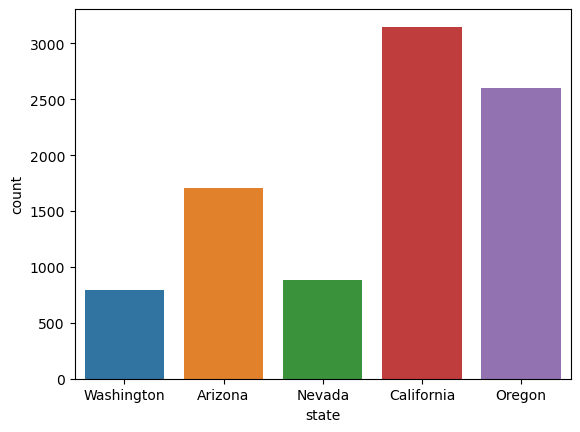

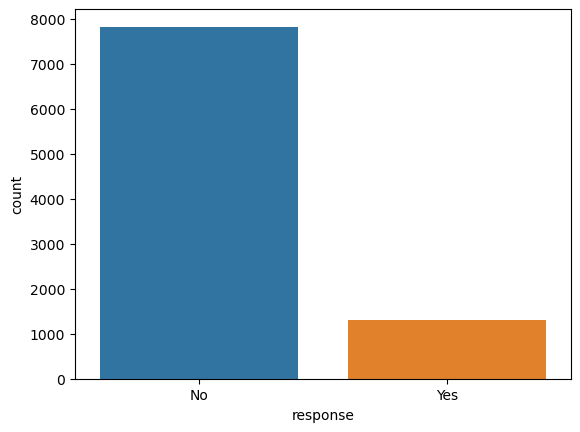

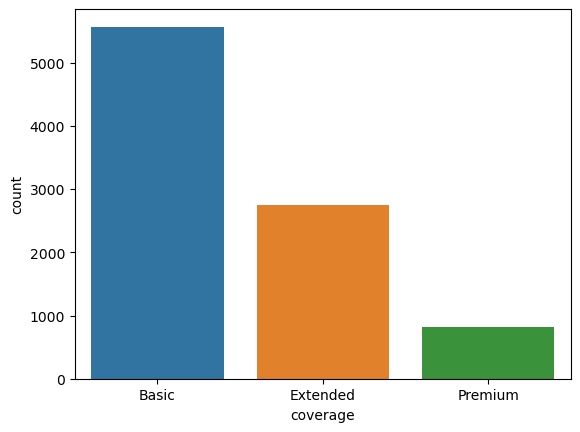

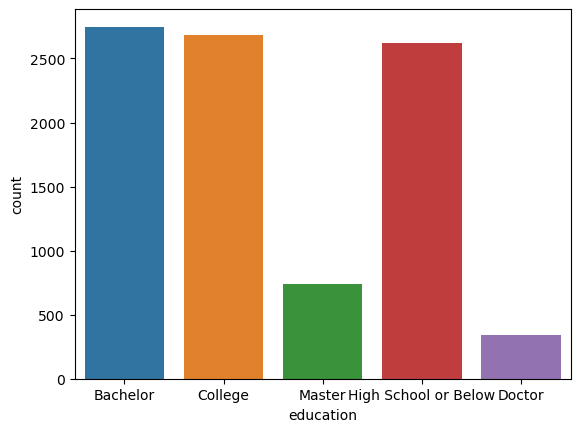

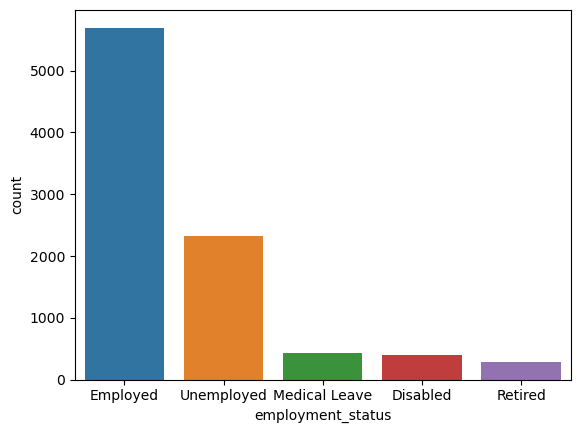

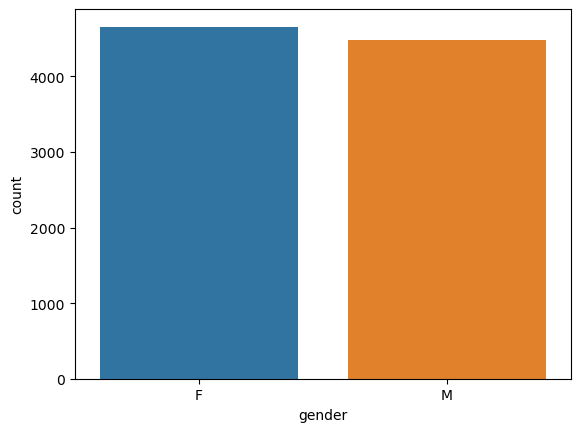

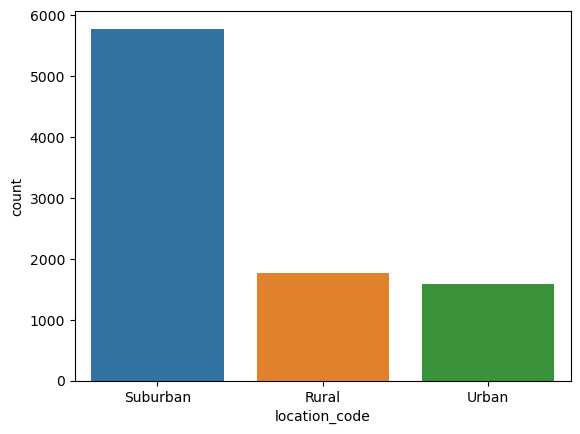

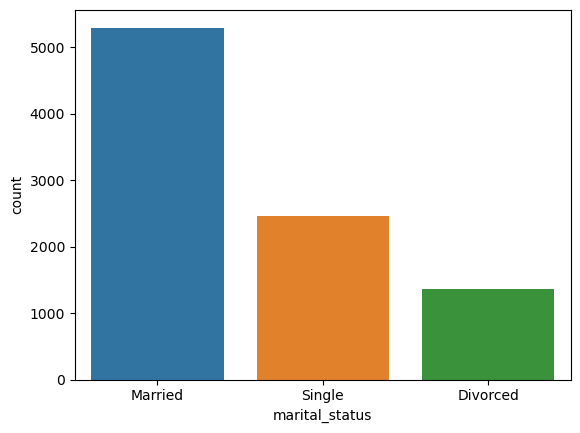

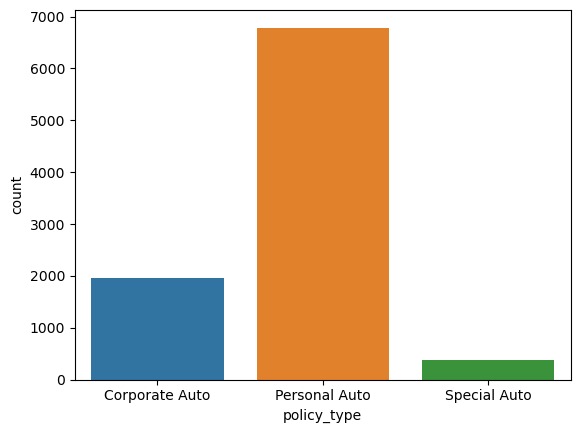

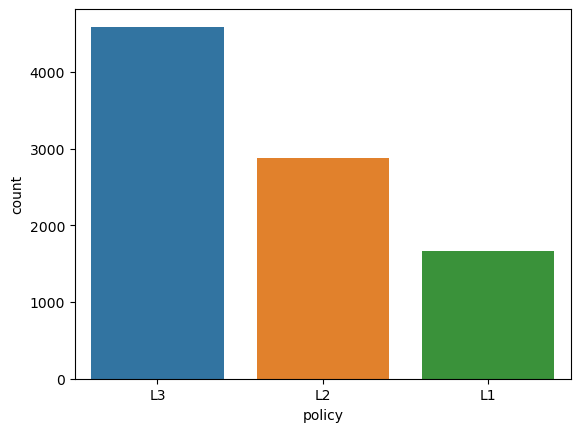

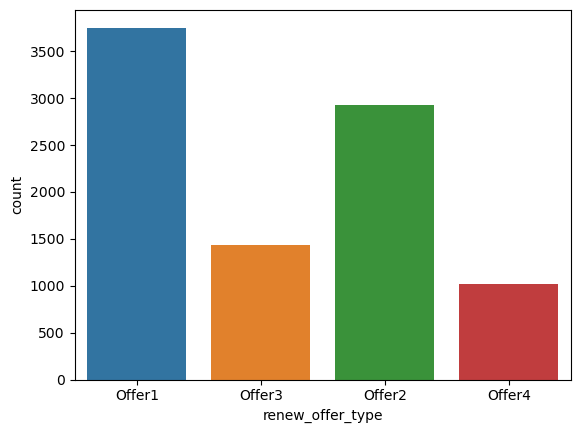

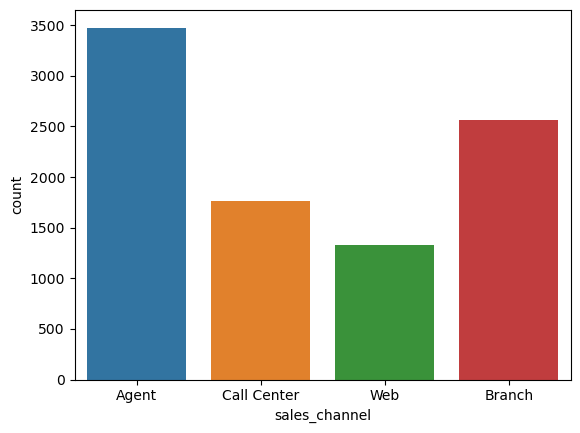

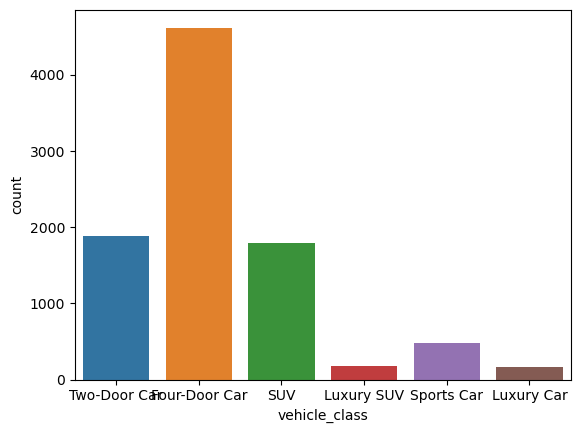

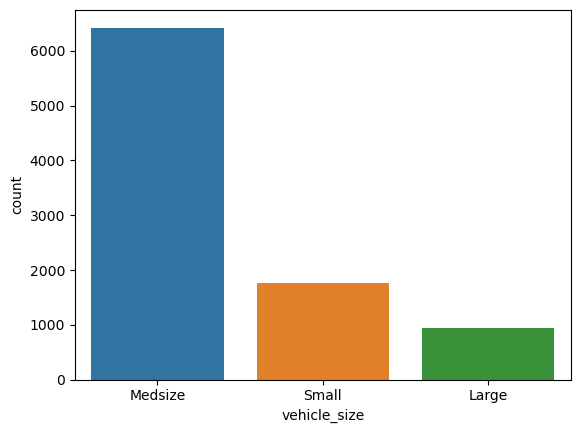

In [185]:
for col_name in discrete_df.columns:
    plt.figure(col_name)
    sns.countplot(x=col_name, data=discrete_df)

In [138]:
# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?


<AxesSubplot:xlabel='effective_to_date', ylabel='count'>

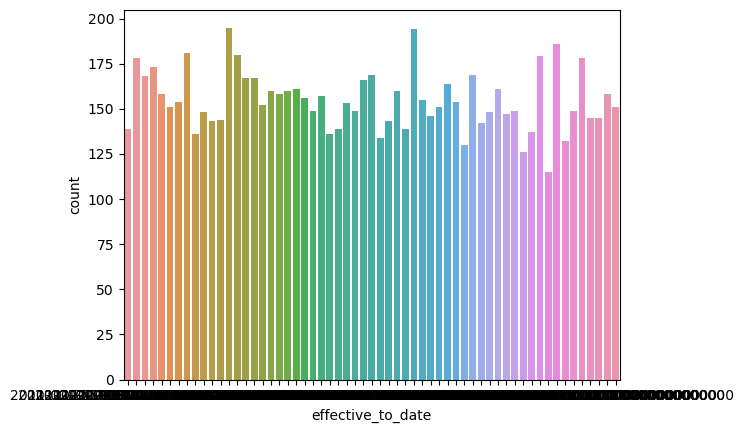

In [139]:
# 4. Plot time variable. Can you extract something from it?

plt.figure('effective_to_date')
sns.countplot(x='effective_to_date', data=customer_df)

In [153]:
customer_df['effective_to_date_week'] = customer_df['effective_to_date'].dt.isocalendar().week

<AxesSubplot:xlabel='effective_to_date_week', ylabel='count'>

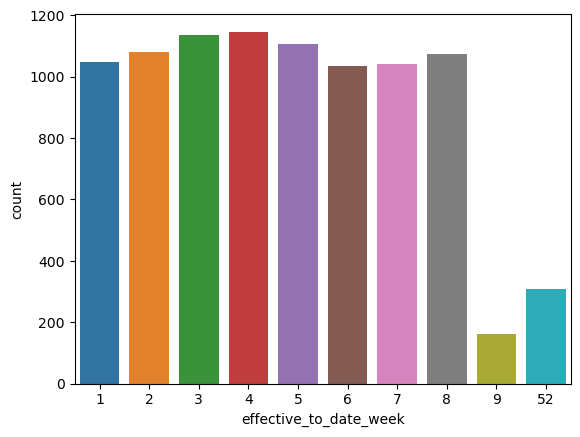

In [154]:
plt.figure('effective_to_date_week')
sns.countplot(x='effective_to_date_week', data=customer_df)